In [1]:
from google.colab import drive
from openpyxl import load_workbook

drive.mount('/content/drive', force_remount=True)
import pandas as pd
file_path = '/content/drive/My Drive/DS Project/loan.xlsx'

wb = load_workbook(file_path, data_only=True)

sheet_name = "loan"  # Replace with your actual sheet name
ws = wb[sheet_name]

# Read Excel using Pandas
data = pd.read_excel(file_path, sheet_name=sheet_name, engine="openpyxl")


print(data.head())

Mounted at /content/drive
        id  member_id  loan_amnt  funded_amnt  discrepency_in_loan_amt  \
0  1077501    1296599       5000         5000                        0   
1  1077430    1314167       2500         2500                        0   
2  1077175    1313524       2400         2400                        0   
3  1076863    1277178      10000        10000                        0   
4  1075358    1311748       3000         3000                        0   

   funded_amnt_inv   term_desc  term  int_rate  installment  ... quarter  \
0           4975.0   36 months    36     10.65       162.87  ...      Q2   
1           2500.0   60 months    60     15.27        59.83  ...      Q1   
2           2400.0   36 months    36     15.96        84.33  ...      Q3   
3          10000.0   36 months    36     13.49       339.31  ...      Q1   
4           3000.0   60 months    60     12.69        67.79  ...      Q2   

           Loan Title Risk_Score Debt-To-Income Ratio State  Policy Code

In [2]:
print(data["loan_status"])

0         Non-default
1             Default
2         Non-default
3         Non-default
4         Non-default
             ...     
199994    Non-default
199995    Non-default
199996    Non-default
199997    Non-default
199998    Non-default
Name: loan_status, Length: 199999, dtype: object


In [3]:
print(data.isnull().sum())

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
discrepency_in_loan_amt      0
                            ..
Policy Code                  0
income_to_loan_ratio         0
credit_utilization_ratio     2
profit_margin                0
delinq_risk                  0
Length: 103, dtype: int64


#### Dropped these columns as they were replaced with **calculated and refined** versions.

In [4]:
# List of columns to drop
columns_to_drop = ['term_desc','issue_d_dateformat','loan_desc','earliest_cr_line_desc','last_pymnt_d_desc','Application Date & time']
# Drop columns
data = data.drop(columns=columns_to_drop)

# Display updated DataFrame
print(data.head())

        id  member_id  loan_amnt  funded_amnt  discrepency_in_loan_amt  \
0  1077501    1296599       5000         5000                        0   
1  1077430    1314167       2500         2500                        0   
2  1077175    1313524       2400         2400                        0   
3  1076863    1277178      10000        10000                        0   
4  1075358    1311748       3000         3000                        0   

   funded_amnt_inv  term  int_rate  installment grade  ... quarter  \
0           4975.0    36     10.65       162.87     B  ...      Q2   
1           2500.0    60     15.27        59.83     C  ...      Q1   
2           2400.0    36     15.96        84.33     C  ...      Q3   
3          10000.0    36     13.49       339.31     C  ...      Q1   
4           3000.0    60     12.69        67.79     B  ...      Q2   

           Loan Title Risk_Score Debt-To-Income Ratio  State  Policy Code  \
0            Vacation        487                34.25    

In [32]:
import warnings
warnings.filterwarnings("ignore")
df_copy = data.copy()

In [33]:
def check_missing_values(df_copy):
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0]

    if missing_values.empty:
        print("No missing values found.")
    else:
        print("Missing values detected:")
        print(missing_values)
        print("\nTotal missing values:", df_copy.isnull().sum().sum())


check_missing_values(df_copy)

Missing values detected:
emp_title                       12488
emp_length                       7945
annual_inc                          4
desc                           108443
title                              22
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq_raw     114312
mths_since_last_record         179817
open_acc                           29
pub_rec                            29
revol_util                        182
total_acc                          29
next_pymnt_d                   129801
last_credit_pull_d_desc            15
collections_12_mths_ex_med        145
mths_since_last_major_derog    167932
credit_utilization_ratio            2
dtype: int64

Total missing values: 721253


#### Handling missing values

In [34]:
def handle_categorical_missing_values(df):
    # Drop 'desc' and 'next_pymnt_d' as they have excessive missing values
    df.drop(columns=['emp_title','last_credit_pull_d_desc','desc', 'next_pymnt_d'], inplace=True)

    # List of categorical columns that need missing value handling
    categorical_cols = ['emp_length', 'title']

    # Fill missing values in categorical columns with "Unknown"
    for col in categorical_cols:
        df[col].fillna("Unknown", inplace=True)

    print("Categorical missing values handled. 'desc' and 'next_pymnt_d' dropped.")
    return df

df = handle_categorical_missing_values(df_copy)

Categorical missing values handled. 'desc' and 'next_pymnt_d' dropped.


In [35]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]

    if missing_values.empty:
        print("No missing values found.")
    else:
        print("Missing values detected:")
        print(missing_values)
        print("\nTotal missing values:", df.isnull().sum().sum())


check_missing_values(df)

Missing values detected:
annual_inc                          4
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq_raw     114312
mths_since_last_record         179817
open_acc                           29
pub_rec                            29
revol_util                        182
total_acc                          29
collections_12_mths_ex_med        145
mths_since_last_major_derog    167932
credit_utilization_ratio            2
dtype: int64

Total missing values: 462539


In [36]:
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt',
       'discrepency_in_loan_amt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'JOINT ACC HOLDER INC',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq_raw',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', ' profit_to_lender', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'fico_range_low', 'fico_range_high',
       'fico_average', 'last_fico_range_low', 'last_fico_rang

In [37]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.replace(r'\s+', '_', regex=True)  # Replace spaces with underscores
df.columns = df.columns.str.encode('ascii', 'ignore').str.decode('utf-8')  # Remove special characters

print(df.columns.tolist())  # Check cleaned column names

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'discrepency_in_loan_amt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'annual_inc_joint', 'JOINT_ACC_HOLDER_INC', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq_raw', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'profit_to_lender', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'fico_range_low', 'fico_range_high', 'fico_average', 'last_fico_range_low', 'last_fico_range_high', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 

In [38]:
print(df["credit_utilization_ratio"].head())  # Check values
print(df["credit_utilization_ratio"].dtype)  # Check column type
print(df["credit_utilization_ratio"].isnull().sum())  # Check NaN count

0    0.312605
1    0.101535
2    0.253538
3    0.156255
4    0.972726
Name: credit_utilization_ratio, dtype: float64
float64
2


In [39]:
import numpy as np
df.replace("#DIV/0!", np.nan, inplace=True)

# Convert column to numeric (forcing errors='coerce' to convert invalid values to NaN)
df["credit_utilization_ratio"] = pd.to_numeric(df["credit_utilization_ratio"], errors="coerce")

# Fill NaN values with 0 (or use median if preferred)
df["credit_utilization_ratio"].fillna(0, inplace=True)  # Use df["credit_utilization_ratio"].median() if needed


In [40]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]

    if missing_values.empty:
        print("No missing values found.")
    else:
        print("Missing values detected:")
        print(missing_values)
        print("\nTotal missing values:", df.isnull().sum().sum())


check_missing_values(df)

Missing values detected:
annual_inc                          4
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq_raw     114312
mths_since_last_record         179817
open_acc                           29
pub_rec                            29
revol_util                        182
total_acc                          29
collections_12_mths_ex_med        145
mths_since_last_major_derog    167932
dtype: int64

Total missing values: 462537


In [41]:
for col in ['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med']:
    df[col].fillna(0, inplace=True)

In [42]:
df.drop(columns=["mths_since_last_delinq_raw", "mths_since_last_record","mths_since_last_major_derog"], inplace=True)
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt',
       'discrepency_in_loan_amt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'JOINT_ACC_HOLDER_INC',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'profit_to_lender', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'fico_range_low', 'fico_range_high', 'fico_average',
       'last_fico_range_low', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'policy_code', 'ap

In [43]:
for col in ['annual_inc', 'revol_util']:
    df[col].fillna(df[col].median(), inplace=True)

In [44]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]

    if missing_values.empty:
        print("No missing values found.")
    else:
        print("Missing values detected:")
        print(missing_values)
        print("\nTotal missing values:", df.isnull().sum().sum())


check_missing_values(df)

No missing values found.


In [45]:
print(df.shape)

(199999, 90)


In [46]:
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt',
       'discrepency_in_loan_amt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'JOINT_ACC_HOLDER_INC',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'profit_to_lender', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'fico_range_low', 'fico_range_high', 'fico_average',
       'last_fico_range_low', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'policy_code', 'ap

In [47]:
df_cleaned = df_copy.copy()

In [48]:
print(df_cleaned.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt',
       'discrepency_in_loan_amt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'JOINT_ACC_HOLDER_INC',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'profit_to_lender', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'fico_range_low', 'fico_range_high', 'fico_average',
       'last_fico_range_low', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'policy_code', 'ap

## IV Scores

In [49]:
def convert_target_variable(df, target_variable):
    """Convert categorical target variable to numeric."""
    df[target_variable] = df[target_variable].astype('category').cat.codes
    return df

def calculate_woe_iv(df, feature, target):
    """Calculate WOE and IV for a given feature without dropping missing values."""
    df = df[[feature, target]].copy()

    # Handle categorical variables
    if df[feature].dtype == 'O' or df[feature].dtype.name == 'category':
        df[feature] = df[feature].astype('category')

    # Bin continuous variables (with duplicates='drop' to avoid single bin issues)
    try:
        if df[feature].dtype.name != 'category':
            df[feature] = pd.qcut(df[feature].astype(float), q=10, duplicates='drop')
    except Exception:
        return 0  # If binning fails, return IV as 0

    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped.columns = ['total', 'events']
    grouped['non_events'] = grouped['total'] - grouped['events']

    # Avoid division by zero
    if grouped['events'].sum() == 0 or grouped['non_events'].sum() == 0:
        return 0

    # Calculate event and non-event rates
    grouped['event_rate'] = grouped['events'] / grouped['events'].sum()
    grouped['non_event_rate'] = grouped['non_events'] / grouped['non_events'].sum()

    # Compute WOE and IV
    grouped['woe'] = np.log((grouped['event_rate'] + 1e-10) / (grouped['non_event_rate'] + 1e-10))
    grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe']

    return grouped['iv'].sum()

def compute_iv_scores(df, target_variable, feature_columns):
    """Compute IV scores for all given features."""
    iv_scores = {}
    df = convert_target_variable(df, target_variable)

    for col in feature_columns:
        try:
            iv_value = calculate_woe_iv(df, col, target_variable)
            iv_scores[col] = iv_value if iv_value is not None else 0
        except Exception:
            iv_scores[col] = 0  # Assign 0 for errors

    # Convert IV scores to vertical format
    iv_results = pd.DataFrame.from_dict(iv_scores, orient='index', columns=['IV Score'])

    return iv_results

# Example Usage

target_variable = 'loan_status'
feature_columns = ['id', 'member_id', 'loan_amnt', 'funded_amnt',
       'discrepency_in_loan_amt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'JOINT_ACC_HOLDER_INC',
       'verification_status', 'issue_d', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'profit_to_lender', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'fico_range_low', 'fico_range_high', 'fico_average',
       'last_fico_range_low', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'is_inc_v',
       'pymnt_plan', 'tax_liens', '#_of_bnks_across_accounts',
       'Application_date', 'quarter', 'Loan_Title', 'Risk_Score',
       'Debt-To-Income_Ratio', 'State', 'Policy_Code', 'income_to_loan_ratio',
       'credit_utilization_ratio', 'profit_margin', 'delinq_risk']  # List of features
iv_results = compute_iv_scores(df_cleaned, target_variable, feature_columns)
print(iv_results)


                          IV Score
id                        0.036989
member_id                 0.036648
loan_amnt                 0.004591
funded_amnt               0.004243
discrepency_in_loan_amt   0.000000
...                            ...
Policy_Code               0.000000
income_to_loan_ratio      0.065322
credit_utilization_ratio  0.001383
profit_margin             4.234221
delinq_risk               0.022605

[89 rows x 1 columns]


In [50]:
pd.set_option('display.max_rows', None)  # Display all rows
print(iv_results)
pd.reset_option('display.max_rows')  # Reset to default after displaying


                            IV Score
id                          0.036989
member_id                   0.036648
loan_amnt                   0.004591
funded_amnt                 0.004243
discrepency_in_loan_amt     0.000000
funded_amnt_inv             0.004626
term                        0.000000
int_rate                    0.262097
installment                 0.004272
grade                       0.281389
sub_grade                   0.308084
emp_length                  0.005052
home_ownership              0.020124
annual_inc                  0.058570
annual_inc_joint            0.000120
JOINT_ACC_HOLDER_INC        0.004675
verification_status         0.007036
issue_d                     0.038227
purpose                     0.042318
title                       7.077286
zip_code                    0.096239
addr_state                  0.013791
dti                         0.029111
delinq_2yrs                 0.000020
earliest_cr_line            0.012925
inq_last_6mths              0.037563
m

#### IV Scores < 0.004

In [51]:
low_iv_features = iv_results[iv_results['IV Score'] < 0.004]
print(low_iv_features)


                            IV Score
discrepency_in_loan_amt     0.000000
term                        0.000000
annual_inc_joint            0.000120
delinq_2yrs                 0.000020
mths_since_last_delinq      0.000338
open_acc                    0.000806
pub_rec                     0.000000
revol_bal                   0.003152
total_rec_late_fee          0.000000
recoveries                  0.000000
collection_recovery_fee     0.000000
fico_range_low              0.000450
fico_range_high             0.000628
fico_average                0.000443
last_fico_range_low         0.000237
last_fico_range_high        0.000109
collections_12_mths_ex_med  0.000000
policy_code                 0.000000
application_type            0.003377
dti_joint                   0.000519
verification_status_joint   0.000053
acc_now_delinq              0.000159
tot_coll_amt                0.000601
tot_cur_bal                 0.000488
open_acc_6m                 0.000347
open_il_6m                  0.000283
o

In [52]:
# Assuming 'iv_results' is a DataFrame containing IV values for all features
selected_features = iv_results[iv_results['IV Score'] >= 0.004].index.tolist()

# Print the selected features
print("Features with IV >= 0.005:", selected_features)


Features with IV >= 0.005: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'JOINT_ACC_HOLDER_INC', 'verification_status', 'issue_d', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'profit_to_lender', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'income_to_loan_ratio', 'profit_margin', 'delinq_risk']


In [53]:
# Selecting numerical features from the selected features list
numerical_features = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
    'annual_inc', 'JOINT_ACC_HOLDER_INC', 'dti', 'inq_last_6mths', 'revol_util',
    'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
    'profit_to_lender', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt',
    'income_to_loan_ratio', 'profit_margin', 'delinq_risk'
]



##Calculating VIF:

VIF (Variance Inflation Factor) is used to detect multicollinearity in numerical features because it measures how much the variance of a regression coefficient is inflated due to multicollinearity among independent variables.

Remove multicollinear features (VIF > 7.5, depending on strictness).

###Why Does VIF Become Infinite?

1. Perfect Multicollinearity – One feature is a perfect linear combination of another.
Example: "funded_amnt" and "loan_amnt" are identical in most of the cases, VIF will be infinite.

2. Constant or Almost Constant Columns – If a feature has the same value for all rows, it has zero variance, making its VIF undefined.

3. Too Many Missing Values – If a feature has mostly NaNs and gets imputed with a constant value, it can lead to a high or infinite VIF.

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, numerical_features):
    """Calculate VIF for numerical features and return as DataFrame."""
    # Select only numerical columns
    df_numeric = df[numerical_features].copy()

    # Convert to numeric (forcing errors='coerce' will replace non-numeric with NaN)
    df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

    # Drop rows with NaN values to avoid errors
    df_numeric = df_numeric.dropna()

    # Compute VIF
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df_numeric.columns
    vif_data['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

    return vif_data

# Calculate VIF again with cleaned numerical data
vif_results = calculate_vif(df_cleaned, numerical_features)
print(vif_results)


                 Feature           VIF
0              loan_amnt  6.000066e+02
1            funded_amnt           inf
2        funded_amnt_inv  1.428646e+03
3               int_rate  1.627163e+01
4            installment  7.132471e+01
5             annual_inc  5.201659e+00
6   JOINT_ACC_HOLDER_INC  2.845243e+00
7                    dti  6.920164e+00
8         inq_last_6mths  1.763915e+00
9             revol_util  8.363268e+00
10             total_acc  6.669332e+00
11             out_prncp  1.483181e+05
12         out_prncp_inv  1.482852e+05
13           total_pymnt           inf
14       total_pymnt_inv  1.372538e+03
15      profit_to_lender           inf
16       total_rec_prncp  5.443006e+02
17         total_rec_int  7.402234e+01
18       last_pymnt_amnt  3.359040e+00
19  income_to_loan_ratio  2.914863e+00
20         profit_margin  4.240394e+00
21           delinq_risk  1.208247e+00


In [55]:
# Filter features with VIF less than 7.5
filtered_features = vif_results[vif_results['VIF'] < 7.5]['Feature'].tolist()
print("Features with VIF < 7.5:", filtered_features)

Features with VIF < 7.5: ['annual_inc', 'JOINT_ACC_HOLDER_INC', 'dti', 'inq_last_6mths', 'total_acc', 'last_pymnt_amnt', 'income_to_loan_ratio', 'profit_margin', 'delinq_risk']


In [56]:
# Filter features with VIF more than 7.5
vif_high_features = vif_results[vif_results['VIF'] > 7.5]['Feature'].tolist()
print("Features with VIF > 7.5:", vif_high_features)

Features with VIF > 7.5: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'profit_to_lender', 'total_rec_prncp', 'total_rec_int']


### Keeping funded_amt despite high VIF

funded_amnt is critical for business understanding, it can still be retained despite a high VIF.

Even though it's correlated with loan_amnt, it provides unique business meaning.

### Rest conisdering features having VIF < 7.5

1. VIF > 7.5 indicates high multicollinearity, meaning those features are redundant.

2. By filtering out high VIF features, we remove collinear variables, making correlation analysis more meaningful.

3. Redundant features can distort correlation insights, so we focus only on the selected features.



                      annual_inc  JOINT_ACC_HOLDER_INC       dti  \
annual_inc              1.000000             -0.196266 -0.168477   
JOINT_ACC_HOLDER_INC   -0.196266              1.000000  0.052659   
dti                    -0.168477              0.052659  1.000000   
inq_last_6mths          0.064658             -0.020507 -0.006797   
total_acc               0.233813             -0.078690  0.241437   
last_pymnt_amnt         0.154489             -0.052305 -0.016512   
income_to_loan_ratio    0.404999             -0.063226 -0.146059   
profit_margin           0.016877             -0.007317 -0.082161   
funded_amnt             0.336578             -0.110107  0.085259   

                      inq_last_6mths  total_acc  last_pymnt_amnt  \
annual_inc                  0.064658   0.233813         0.154489   
JOINT_ACC_HOLDER_INC       -0.020507  -0.078690        -0.052305   
dti                        -0.006797   0.241437        -0.016512   
inq_last_6mths              1.000000   0.127246

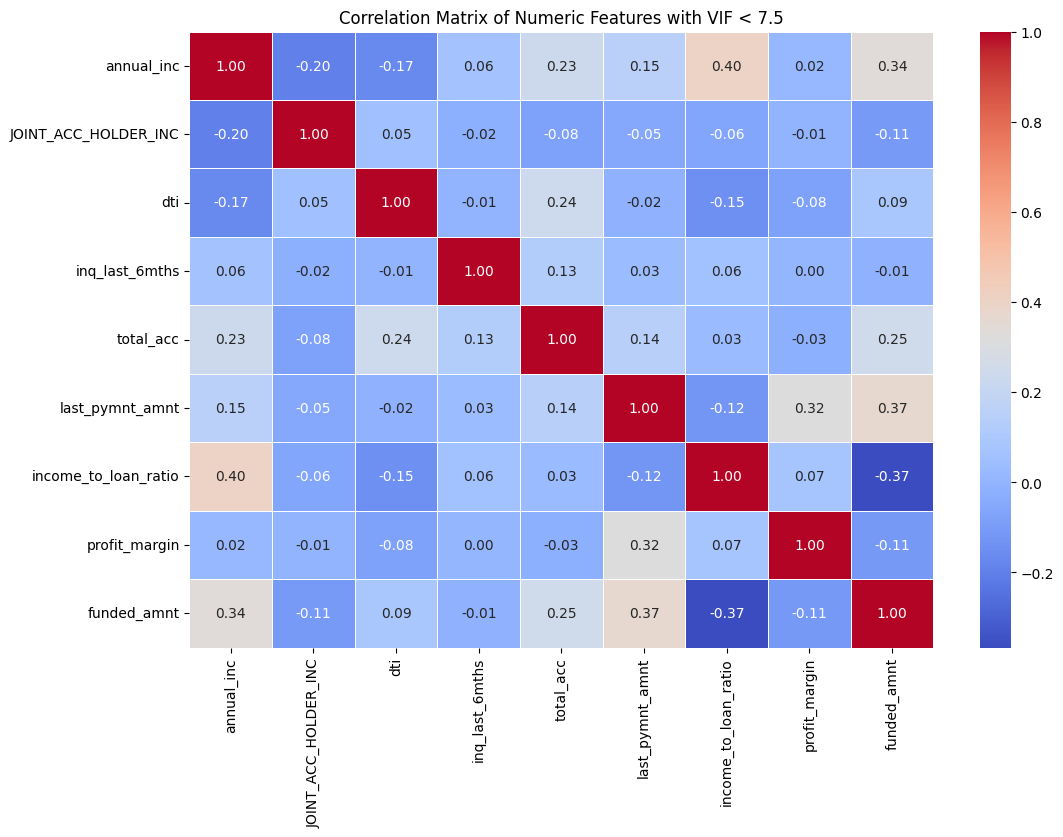

In [57]:
# Filter numeric features with VIF < 7.5
numeric_filtered_features = df_cleaned[filtered_features].select_dtypes(include=['number']).columns.tolist()
numeric_filtered_features.append('funded_amnt')
# Compute correlation matrix for numeric features with VIF < 7.5
correlation_matrix = df_cleaned[numeric_filtered_features].corr()

# Display correlation matrix
print(correlation_matrix)

# Optional: Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features with VIF < 7.5")
plt.show()


### Since none of the correlations are too high, we should not drop any features based on correlation alone.

#WoE Calculation of sub_grade, purpose and addr_state feature


In [58]:
def calculate_woe(df, feature, target):
    """Compute Weight of Evidence (WoE) for a categorical feature."""
    df = df[[feature, target]].copy()

    # Convert categorical variables to category type
    if df[feature].dtype == 'O' or df[feature].dtype.name == 'category':
        df[feature] = df[feature].astype('category')

    # Group by feature and compute event/non-event counts
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped.columns = ['total', 'events']
    grouped['non_events'] = grouped['total'] - grouped['events']

    # Avoid division by zero
    if grouped['events'].sum() == 0 or grouped['non_events'].sum() == 0:
        return None

    # Compute event and non-event rates
    grouped['event_rate'] = grouped['events'] / grouped['events'].sum()
    grouped['non_event_rate'] = grouped['non_events'] / grouped['non_events'].sum()

    # Calculate WoE
    grouped['woe'] = np.log((grouped['event_rate'] + 1e-10) / (grouped['non_event_rate'] + 1e-10))

    return grouped[['woe']]

# Example Usage:
woe_sub_grade = calculate_woe(df_cleaned, 'sub_grade', 'loan_status')
woe_purpose = calculate_woe(df_cleaned, 'purpose', 'loan_status')
woe_addr_state = calculate_woe(df_cleaned, 'addr_state', 'loan_status')

print("WoE for sub_grade:\n", woe_sub_grade)
print("\nWoE for purpose:\n", woe_purpose)
print("\nWoE for addr_state:\n", woe_addr_state)


WoE for sub_grade:
                 woe
sub_grade          
A1         1.797478
A2         1.371824
A3         1.209578
A4         0.933300
A5         0.780453
B1         0.644591
B2         0.519987
B3         0.371114
B4         0.234239
B5         0.098433
C1         0.053868
C2        -0.000420
C3        -0.138364
C4        -0.164275
C5        -0.246550
D1        -0.381321
D2        -0.423048
D3        -0.446151
D4        -0.530420
D5        -0.515536
E1        -0.566929
E2        -0.649511
E3        -0.653128
E4        -0.751573
E5        -0.727276
F1        -0.713601
F2        -0.842453
F3        -0.931184
F4        -1.050707
F5        -1.181338
G1        -1.068969
G2        -0.948443
G3        -1.201977
G4        -0.745163
G5        -1.087679

WoE for purpose:
                          woe
purpose                     
car                 0.240319
credit_card         0.258522
debt_consolidation -0.030173
educational        -0.631115
home_improvement    0.136505
house             

In [59]:
# Convert DataFrame to dictionary for mapping
woe_dict_sub_grade = woe_sub_grade['woe'].to_dict()
woe_dict_purpose = woe_purpose['woe'].to_dict()
woe_dict_addr_state = woe_addr_state['woe'].to_dict()

# Apply mapping to the original dataset
df_cleaned['sub_grade_woe'] = df_cleaned['sub_grade'].map(woe_dict_sub_grade)
df_cleaned['purpose_woe'] = df_cleaned['purpose'].map(woe_dict_purpose)
df_cleaned['addr_state_woe'] = df_cleaned['addr_state'].map(woe_dict_addr_state)

# Drop original categorical columns (optional)
df_cleaned.drop(columns=['sub_grade', 'purpose', 'addr_state'], inplace=True)

# Display results to verify
print(df_cleaned[['sub_grade_woe', 'purpose_woe', 'addr_state_woe']].head())


   sub_grade_woe  purpose_woe  addr_state_woe
0       0.519987     0.258522       -0.002387
1      -0.164275     0.240319        0.071142
2      -0.246550    -0.837257        0.092480
3       0.053868    -0.298360       -0.029450
4       0.098433    -0.298360        0.088188


In [60]:
print(df_cleaned.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt',
       'discrepency_in_loan_amt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'JOINT_ACC_HOLDER_INC', 'verification_status',
       'issue_d', 'loan_status', 'title', 'zip_code', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'profit_to_lender', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'fico_range_low', 'fico_range_high',
       'fico_average', 'last_fico_range_low', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'dti_joint', 'verific

In [61]:
selected_features.extend(['sub_grade_woe', 'purpose_woe', 'addr_state_woe'])

# Dropping original categorical columns after WOE transformation
dropped_features = ['sub_grade', 'purpose', 'addr_state']

# Final selection of IV-based features
iv_selected_features = list(set(selected_features) - set(dropped_features))

# Ensuring 'loan_amnt' and 'funded_amnt' remain in the final selection
vif_high_features_filtered = [feature for feature in vif_high_features if feature not in ['loan_amnt', 'funded_amnt']]

# Step 3: Select final feature set
final_selected_features = list(set(iv_selected_features) - set(vif_high_features_filtered))

# Step 4: Update df_cleaned with the selected features
df_cleaned = df_cleaned[final_selected_features]


In [62]:
print(df_cleaned.columns)

Index(['verification_status', 'last_pymnt_d', 'emp_length', 'home_ownership',
       'total_acc', 'id', 'grade', 'initial_list_status', 'profit_margin',
       'JOINT_ACC_HOLDER_INC', 'annual_inc', 'loan_amnt', 'earliest_cr_line',
       'funded_amnt', 'delinq_risk', 'last_credit_pull_d', 'inq_last_6mths',
       'purpose_woe', 'sub_grade_woe', 'issue_d', 'last_pymnt_amnt',
       'zip_code', 'member_id', 'addr_state_woe', 'title',
       'income_to_loan_ratio', 'dti'],
      dtype='object')


## Why Drop zip_code ?

1. Encoding Issue: zip_code is alphanumeric, making it harder to encode meaningfully without high cardinality issues.

2. Correlation with addr_state: zip_code and addr_state are highly related, as multiple zip codes fall under the same state. Keeping both could lead to redundancy.

3. Business Need > IV Score: Since addr_state is needed for analysis, we prioritize it over zip_code, even if its IV is lower.

In [63]:
df_cleaned = df_cleaned.drop(columns=['zip_code','grade'], errors='ignore')

In [64]:
df_cleaned = df_cleaned.drop(columns=['grade'], errors='ignore')

In [65]:
# Extract categorical columns from df_cleaned
categorical_features = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

# Ensure 'loan_status' is included in the list
if 'loan_status' not in categorical_features:
    categorical_features.append('loan_status')

print("Categorical Features:", categorical_features)


Categorical Features: ['verification_status', 'emp_length', 'home_ownership', 'initial_list_status', 'delinq_risk', 'title', 'loan_status']


### Dropping Title?

Though purpose IV score is 0.042318 and title IV score is much higher 7.077286
1. purpose is structured and categorical (fixed range of values), making it easier to analyze and encode.
2. title is unstructured and high-dimensional, containing free-text input, making it noisy and harder to process.
3. Both are correlated, so keeping both would be redundant. Given the business requirement, purpose is the better choice.

In [66]:
df_cleaned = df_cleaned.drop(columns=['title'], errors='ignore')

In [67]:
df_cleaned['loan_status'] = df_copy['loan_status']

In [68]:
print(df_cleaned['emp_length'])


0         10+ years
1          < 1 year
2         10+ years
3         10+ years
4            1 year
            ...    
199994      3 years
199995    10+ years
199996      3 years
199997    10+ years
199998       1 year
Name: emp_length, Length: 199999, dtype: object


In [69]:
# Ensure required columns exist
required_columns = {'annual_inc', 'emp_length'}
missing_columns = required_columns - set(df_cleaned.columns)

if missing_columns:
    raise KeyError(f"Error: Missing columns in df_cleaned: {missing_columns}")

# Step 1: Bin `annual_inc`
income_bins = [-np.inf, 25000, 50000, 75000, 100000, 150000, np.inf]
income_labels = [1, 2, 3, 4, 5, 6]

df_cleaned['annual_inc_bin'] = pd.cut(df_cleaned['annual_inc'], bins=income_bins, labels=income_labels)

# Step 2: Convert `emp_length` to numeric (handle NaNs)
emp_length_mapping = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,
    '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10
}

df_cleaned['emp_length_cleaned'] = df_cleaned['emp_length'].map(emp_length_mapping)

# Ensure missing values are handled
df_cleaned['emp_length_cleaned'] = df_cleaned['emp_length_cleaned'].fillna(-1)

# Step 3: Bin `emp_length_cleaned`
emp_bins = [-2, 1, 3, 5, 10]
emp_labels = [1, 2, 3, 4]

df_cleaned['emp_length_bin'] = pd.cut(df_cleaned['emp_length_cleaned'], bins=emp_bins, labels=emp_labels)

# Display first few rows for validation
print(df_cleaned[['annual_inc', 'annual_inc_bin', 'emp_length', 'emp_length_cleaned', 'emp_length_bin']].head())


   annual_inc annual_inc_bin emp_length  emp_length_cleaned emp_length_bin
0     24000.0              1  10+ years                10.0              4
1     30000.0              2   < 1 year                 0.0              1
2     12252.0              1  10+ years                10.0              4
3     49200.0              2  10+ years                10.0              4
4     80000.0              4     1 year                 1.0              1


In [70]:
# Mapping loan_status to binary values
df_cleaned['loan_status_numeric'] = df_cleaned['loan_status'].map({
    'Default': 1,
    'Non-default': 0
})

# Check if conversion was successful
print(df_cleaned['loan_status_numeric'].value_counts(dropna=False))


loan_status_numeric
0    175412
1     24587
Name: count, dtype: int64


In [71]:
# Ensure we work on a copy of the dataframe
df_woe = df_cleaned.copy()

# Check if required columns exist
required_cols = ['loan_status', 'annual_inc_bin', 'emp_length_bin']
missing_cols = [col for col in required_cols if col not in df_woe.columns]

if missing_cols:
    raise KeyError(f"Missing columns in dataframe: {missing_cols}")

# Step 1: Define WoE calculation function
def calculate_woe(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count', 'sum']).reset_index()
    grouped.columns = [feature, 'total', 'events']

    # Ensure numeric conversion
    grouped['total'] = pd.to_numeric(grouped['total'], errors='coerce')
    grouped['events'] = pd.to_numeric(grouped['events'], errors='coerce')

    # Compute non-events
    grouped['non_events'] = grouped['total'] - grouped['events']

    # Remove bins with zero events or non-events (to avoid division errors)
    grouped = grouped[(grouped['events'] > 0) & (grouped['non_events'] > 0)]

    # Apply Laplace smoothing (if necessary)
    grouped['events'] = grouped['events'].replace(0, 0.5)
    grouped['non_events'] = grouped['non_events'].replace(0, 0.5)

    # Compute event & non-event rates
    total_events = grouped['events'].sum()
    total_non_events = grouped['non_events'].sum()

    grouped['event_rate'] = grouped['events'] / total_events
    grouped['non_event_rate'] = grouped['non_events'] / total_non_events

    # Compute WoE (log odds ratio)
    grouped['WoE'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])

    return grouped[[feature, 'WoE']]

# Step 2: Apply WoE encoding
woe_income = calculate_woe(df_cleaned, 'annual_inc_bin', 'loan_status_numeric')
woe_emp_length = calculate_woe(df_cleaned, 'emp_length_bin', 'loan_status_numeric')

# Display results
print("WoE for Annual Income Bins:")
print(woe_income)

print("\nWoE for Employment Length Bins:")
print(woe_emp_length)


WoE for Annual Income Bins:
  annual_inc_bin       WoE
0              1  0.411261
1              2  0.226543
2              3 -0.002217
3              4 -0.230711
4              5 -0.403764
5              6 -0.417641

WoE for Employment Length Bins:
  emp_length_bin       WoE
0              1  0.094285
1              2  0.009687
2              3  0.009604
3              4 -0.041327


### Applying OHE to categorical features:

In [72]:
# Select categorical columns to encode
categorical_cols = ['initial_list_status', 'verification_status', 'home_ownership']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_cleaned[categorical_cols], prefix=categorical_cols)

# Display the new dataframe with encoded features
print(df_encoded.head())


   initial_list_status_f  initial_list_status_w  \
0                   True                  False   
1                   True                  False   
2                   True                  False   
3                   True                  False   
4                   True                  False   

   verification_status_Not Verified  verification_status_Source Verified  \
0                             False                                False   
1                             False                                 True   
2                              True                                False   
3                             False                                 True   
4                             False                                 True   

   verification_status_Verified  home_ownership_MORTGAGE  home_ownership_NONE  \
0                          True                    False                False   
1                         False                    False                Fa

In [73]:
print(df_cleaned.dtypes)


verification_status       object
last_pymnt_d               int64
emp_length                object
home_ownership            object
total_acc                float64
id                         int64
initial_list_status       object
profit_margin            float64
JOINT_ACC_HOLDER_INC     float64
annual_inc               float64
loan_amnt                  int64
earliest_cr_line           int64
funded_amnt                int64
delinq_risk               object
last_credit_pull_d         int64
inq_last_6mths           float64
purpose_woe              float64
sub_grade_woe            float64
issue_d                    int64
last_pymnt_amnt          float64
member_id                  int64
addr_state_woe           float64
income_to_loan_ratio     float64
dti                      float64
loan_status               object
annual_inc_bin          category
emp_length_cleaned       float64
emp_length_bin          category
loan_status_numeric        int64
dtype: object


In [74]:
print(df_cleaned["delinq_risk"].unique())


[0 0.5 0.21428571428571427 0.08333333333333333 0.14285714285714285
 0.07692307692307693 0.1111111111111111 0.125 0.16666666666666666 0.1
 0.3333333333333333 0.09090909090909091 0.0625 0.03333333333333333 0.2
 0.15384615384615385 0.09523809523809523 0.18181818181818182 0.25
 0.07142857142857142 0.23076923076923078 0.13333333333333333 1 0.04
 0.2857142857142857 0.6666666666666666 0.05555555555555555
 0.058823529411764705 0.05263157894736842 0.4 0.05 0.16 2
 0.3076923076923077 0.06666666666666667 0.3 0.2727272727272727
 0.2222222222222222 0.375 0.6 0.043478260869565216 0.17647058823529413
 0.35294117647058826 0.11764705882352941 0.10526315789473684
 1.6666666666666667 0.42857142857142855 0.037037037037037035
 0.4444444444444444 0.030303030303030304 0.26666666666666666 0.08
 0.047619047619047616 0.15 0.045454545454545456 0.5714285714285714 0.75
 0.1875 0.7142857142857143 1.3333333333333333 0.034482758620689655
 0.38461538461538464 0.03571428571428571 0.5555555555555556 0.8
 0.8333333333333

In [75]:
df_cleaned["delinq_risk"] = pd.to_numeric(df_cleaned["delinq_risk"], errors="coerce")

In [76]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Identify relevant numeric columns to scale
numeric_cols_to_scale = [
    'profit_margin', 'income_to_loan_ratio', 'dti', 'delinq_risk',
    'total_acc', 'inq_last_6mths', 'funded_amnt', 'loan_amnt',
    'last_pymnt_amnt', 'JOINT_ACC_HOLDER_INC'
]

# Step 2: Apply Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[numeric_cols_to_scale]), columns=numeric_cols_to_scale)

print(df_scaled.head())

   profit_margin  income_to_loan_ratio       dti  delinq_risk  total_acc  \
0       0.694089              0.003789  0.790226          0.0   0.085714   
1       0.238910              0.009474  0.028580          0.0   0.038095   
2       0.741049              0.004030  0.249214          0.0   0.095238   
3       0.723942              0.003884  0.571592          0.0   0.352381   
4       0.639916              0.021053  0.512718          0.0   0.361905   

   inq_last_6mths  funded_amnt  loan_amnt  last_pymnt_amnt  \
0        0.030303     0.130435   0.130435         0.004752   
1        0.151515     0.057971   0.057971         0.003313   
2        0.060606     0.055072   0.055072         0.017995   
3        0.030303     0.275362   0.275362         0.009898   
4        0.000000     0.072464   0.072464         0.001877   

   JOINT_ACC_HOLDER_INC  
0              0.362890  
1              0.561774  
2              0.086558  
3              0.303764  
4              0.481482  


In [77]:
print('woe_income' in globals())

True


In [78]:
print(type(woe_income))


<class 'pandas.core.frame.DataFrame'>


In [79]:
dataframes = {'df_woe': df_woe, 'df_cleaned': df_cleaned, 'df_scaled': df_scaled, 'df_encoded': df_encoded}

for name, df in dataframes.items():
    if 'woe_income' in df.columns:
        print(f"'woe_income' found in {name}")


In [80]:
df_final = pd.concat([df_scaled,df_encoded,woe_income,woe_emp_length,df_cleaned[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d','id', 'member_id','addr_state_woe','sub_grade_woe']]], axis=1)
print(df_final.columns)

Index(['profit_margin', 'income_to_loan_ratio', 'dti', 'delinq_risk',
       'total_acc', 'inq_last_6mths', 'funded_amnt', 'loan_amnt',
       'last_pymnt_amnt', 'JOINT_ACC_HOLDER_INC', 'initial_list_status_f',
       'initial_list_status_w', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'annual_inc_bin', 'WoE', 'emp_length_bin', 'WoE', 'issue_d',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'id',
       'member_id', 'addr_state_woe', 'sub_grade_woe'],
      dtype='object')


In [81]:
print(df_final.columns[df_final.columns.duplicated()])


Index(['WoE'], dtype='object')


In [82]:
print(df_final.columns[df_final.columns == 'WoE'])


Index(['WoE', 'WoE'], dtype='object')


In [83]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Step 1: Identify duplicate column names
print("Duplicate Columns:", df_final.columns[df_final.columns.duplicated()])

# Step 2: Rename conflicting columns (if needed)
df_woe = df_woe.rename(columns={'WoE': 'WoE_income'})
df_cleaned = df_cleaned.rename(columns={'WoE': 'WoE_emp_length'})

# Step 3: Merge DataFrames safely
df_final = pd.concat([
    df_scaled,
    df_encoded,
    woe_income, woe_emp_length,
    df_cleaned[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'id', 'member_id', 'addr_state_woe', 'sub_grade_woe']]
], axis=1)

# Step 4: Check for missing values
missing_cols = df_final.columns[df_final.isna().any()]
print("Columns with NaN values:", missing_cols)

# Step 5: Fill missing values with median
imputer = SimpleImputer(strategy='median')
df_final[missing_cols] = imputer.fit_transform(df_final[missing_cols])

# Step 6: Standardize features for kNN
features = df_final.drop(columns=['id'])  # Exclude ID column
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 7: Compute kNN Similarity Score
k = 5  # Adjust k as needed
knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn.fit(features_scaled)
distances, _ = knn.kneighbors(features_scaled)

df_final['kNN_Similarity_Score'] = distances.mean(axis=1)

# Step 8: Store kNN Score separately (keeping original DataFrame unchanged)
df_knn_scores = df_final[['id', 'kNN_Similarity_Score']].copy()

# Step 9: Display results
print(df_knn_scores)


Duplicate Columns: Index(['WoE'], dtype='object')
Columns with NaN values: Index(['delinq_risk', 'annual_inc_bin', 'WoE', 'emp_length_bin', 'WoE'], dtype='object')
             id  kNN_Similarity_Score
0       1077501            471.850706
1       1077430            217.122854
2       1077175            105.049148
3       1076863            302.638298
4       1075358            160.163080
...         ...                   ...
199994  1470183              1.223582
199995  1509442              1.385724
199996  1502008              1.420042
199997  1509620              1.193315
199998  1509438              1.405864

[199999 rows x 2 columns]


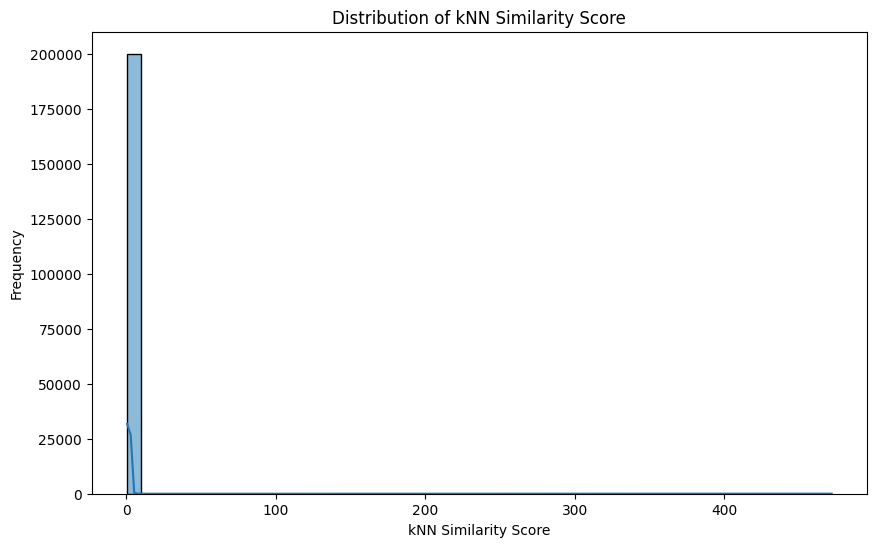

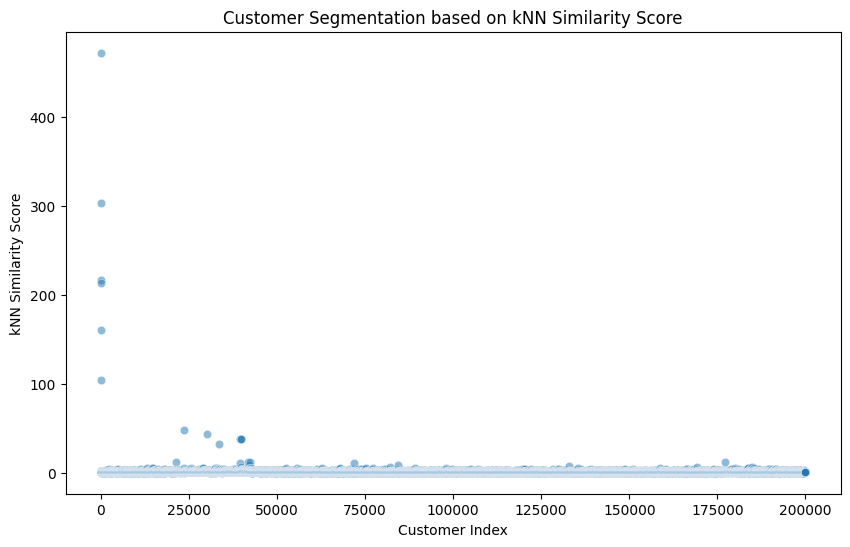

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing kNN Similarity Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_knn_scores['kNN_Similarity_Score'], bins=50, kde=True)
plt.title('Distribution of kNN Similarity Score')
plt.xlabel('kNN Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to see customer segmentation based on similarity scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_final.index, y=df_final['kNN_Similarity_Score'], alpha=0.5)
plt.title('Customer Segmentation based on kNN Similarity Score')
plt.xlabel('Customer Index')
plt.ylabel('kNN Similarity Score')
plt.show()


##Distribution of kNN Similarity Score

X-axis: kNN Similarity Score (how similar each customer is to their nearest neighbors).

Y-axis: Frequency (number of customers with that score).

## Key Observations:

1. Most customers have a very low similarity score, the tall bar at the left means that the majority of customers are very similar to their neighbors.

2. Very few customers have high similarity scores, there are a few points on the right side of the graph (with high kNN Similarity Scores).

  These customers are far from their nearest neighbors, meaning they behave very differently.

  Possible Insights:

  These could be unique customers with special needs (e.g., high-net-worth individuals).

  If this is fraud detection, these outliers could be suspicious users.

  If this is credit risk analysis, these outliers could be high-risk borrowers.

## Customer Segmentation Based on kNN Similarity Score

X-axis: Customer Index (each customer is assigned a number in the dataset).

Y-axis: kNN Similarity Score (average distance to k nearest neighbors).

## Key Observations:
Most customers are clustered at the bottom:

1. The majority of customers have very low similarity scores.

2. This means they belong to well-defined groups with other similar customers.

A few customers have very high similarity scores:

1. Some dots are significantly above the rest, these customers have a high kNN Similarity Score, meaning they are very different from their neighbors.

2. These could be outliers (fraudulent accounts, VIP customers, or rare financial behaviors).

Possible Insights:

If we are analyzing fraud detection, these high-score customers might be suspicious transactions.

If this is customer segmentation, high-score customers might represent niche customer groups.

In [85]:
print(df_final.columns)

Index(['profit_margin', 'income_to_loan_ratio', 'dti', 'delinq_risk',
       'total_acc', 'inq_last_6mths', 'funded_amnt', 'loan_amnt',
       'last_pymnt_amnt', 'JOINT_ACC_HOLDER_INC', 'initial_list_status_f',
       'initial_list_status_w', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'annual_inc_bin', 'WoE', 'emp_length_bin', 'WoE', 'issue_d',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'id',
       'member_id', 'addr_state_woe', 'sub_grade_woe', 'kNN_Similarity_Score'],
      dtype='object')


In [86]:
df_model = df_final.drop(columns=['kNN_Similarity_Score'])

In [87]:
df_model['loan_status_numeric'] = df_cleaned['loan_status_numeric']

In [88]:
print(df_model.columns)

Index(['profit_margin', 'income_to_loan_ratio', 'dti', 'delinq_risk',
       'total_acc', 'inq_last_6mths', 'funded_amnt', 'loan_amnt',
       'last_pymnt_amnt', 'JOINT_ACC_HOLDER_INC', 'initial_list_status_f',
       'initial_list_status_w', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'annual_inc_bin', 'WoE', 'emp_length_bin', 'WoE', 'issue_d',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'id',
       'member_id', 'addr_state_woe', 'sub_grade_woe', 'loan_status_numeric'],
      dtype='object')


### Using logistic regression model, train the model by dividing dataset into DEV Sample, ITV Sample and OTV sample .  

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Define target and features
target_column = 'loan_status_numeric'  # Change this to your actual target column
X = df_model.drop(columns=[target_column])  # Features
y = df_model[target_column]  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_dev, X_temp, y_dev, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)  # 60% DEV
X_itv, X_otv, y_itv, y_otv = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)  # 20% ITV, 20% OTV

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_dev, y_dev)

# Predictions
y_pred_itv = model.predict(X_itv)
y_pred_otv = model.predict(X_otv)

# Evaluate Model
accuracy_itv = accuracy_score(y_itv, y_pred_itv)
accuracy_otv = accuracy_score(y_otv, y_pred_otv)

# Print Results
print(f"ITV Sample Accuracy: {accuracy_itv:.4f}")
print(f"OTV Sample Accuracy: {accuracy_otv:.4f}")


ITV Sample Accuracy: 0.9716
OTV Sample Accuracy: 0.9730


### joblib --> Saving the model

In [90]:
import joblib

# Save the model
joblib.dump(model, 'logistic_regression_model.pkl')

# Load the model later
loaded_model = joblib.load('logistic_regression_model.pkl')


In [91]:
# Predictions on ITV and OTV
y_pred_itv = loaded_model.predict(X_itv)
y_pred_otv = loaded_model.predict(X_otv)

# Evaluate Model
accuracy_itv = accuracy_score(y_itv, y_pred_itv)
accuracy_otv = accuracy_score(y_otv, y_pred_otv)

# Print Results
print(f"ITV Sample Accuracy: {accuracy_itv:.4f}")
print(f"OTV Sample Accuracy: {accuracy_otv:.4f}")


ITV Sample Accuracy: 0.9716
OTV Sample Accuracy: 0.9730


### Here are important performance metrics that we will use them to determine that my model is stable and predicting correctly

In [92]:
# Predict probabilities for log-loss and ROC AUC
y_prob_itv = loaded_model.predict_proba(X_itv)[:, 1]  # Probability for positive class
y_prob_otv = loaded_model.predict_proba(X_otv)[:, 1]  # Probability for positive class

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss

# Evaluate Model - ITV
accuracy_itv = accuracy_score(y_itv, y_pred_itv)
precision_itv = precision_score(y_itv, y_pred_itv)
recall_itv = recall_score(y_itv, y_pred_itv)
f1_itv = f1_score(y_itv, y_pred_itv)
cm_itv = confusion_matrix(y_itv, y_pred_itv)
roc_auc_itv = roc_auc_score(y_itv, y_prob_itv)
log_loss_itv = log_loss(y_itv, y_prob_itv)

# Evaluate Model - OTV
accuracy_otv = accuracy_score(y_otv, y_pred_otv)
precision_otv = precision_score(y_otv, y_pred_otv)
recall_otv = recall_score(y_otv, y_pred_otv)
f1_otv = f1_score(y_otv, y_pred_otv)
cm_otv = confusion_matrix(y_otv, y_pred_otv)
roc_auc_otv = roc_auc_score(y_otv, y_prob_otv)
log_loss_otv = log_loss(y_otv, y_prob_otv)

# Print Results for ITV
print("ITV Sample Results:")
print(f"Accuracy: {accuracy_itv:.4f}")
print(f"Precision: {precision_itv:.4f}")
print(f"Recall: {recall_itv:.4f}")
print(f"F1-Score: {f1_itv:.4f}")
print(f"Confusion Matrix:\n{cm_itv}")
print(f"ROC AUC: {roc_auc_itv:.4f}")
print(f"Log-Loss: {log_loss_itv:.4f}")

# Print Results for OTV
print("\nOTV Sample Results:")
print(f"Accuracy: {accuracy_otv:.4f}")
print(f"Precision: {precision_otv:.4f}")
print(f"Recall: {recall_otv:.4f}")
print(f"F1-Score: {f1_otv:.4f}")
print(f"Confusion Matrix:\n{cm_otv}")
print(f"ROC AUC: {roc_auc_otv:.4f}")
print(f"Log-Loss: {log_loss_otv:.4f}")


ITV Sample Results:
Accuracy: 0.9716
Precision: 0.9489
Recall: 0.8125
F1-Score: 0.8755
Confusion Matrix:
[[34867   215]
 [  922  3996]]
ROC AUC: 0.9822
Log-Loss: 0.0879

OTV Sample Results:
Accuracy: 0.9730
Precision: 0.9548
Recall: 0.8196
F1-Score: 0.8820
Confusion Matrix:
[[34892   191]
 [  887  4030]]
ROC AUC: 0.9840
Log-Loss: 0.0841


 1. Model is performing well on both ITV and OTV samples, with accuracy above 97%, high precision and recall, and good F1-scores.

2. The ROC AUC and log-loss also indicate that the model is providing reliable probability estimates and performing very well in terms of classification quality.

3. Log-loss is low, suggesting that the model's probability estimates are trustworthy.

In [94]:
df_final['loan_status_numeric'] = df_cleaned['loan_status_numeric']

In [95]:
print(df_final.columns)

Index(['profit_margin', 'income_to_loan_ratio', 'dti', 'delinq_risk',
       'total_acc', 'inq_last_6mths', 'funded_amnt', 'loan_amnt',
       'last_pymnt_amnt', 'JOINT_ACC_HOLDER_INC', 'initial_list_status_f',
       'initial_list_status_w', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'annual_inc_bin', 'WoE', 'emp_length_bin', 'WoE', 'issue_d',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'id',
       'member_id', 'addr_state_woe', 'sub_grade_woe', 'kNN_Similarity_Score',
       'loan_status_numeric'],
      dtype='object')


In [96]:
df_cr_score = df_final.drop(columns=['kNN_Similarity_Score'])

In [97]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming df_model is your dataset and it contains a column 'customer_id'
target_column = 'loan_status_numeric'  # Change this to your actual target column
X = df_cr_score.drop(columns=[target_column, 'member_id'])  # Features (excluding customer_id)
y = df_cr_score[target_column]  # Target variable

# Standardize the features (same as during model training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_scaled, y)

# Base score and scaling factor (these can be set based on business rules)
base_score = 600
scaling_factor = 28.85

# Calculate log-odds (z) for each sample using scaled features
log_odds = model.predict_proba(X_scaled)[:, 1]  # Get probabilities for the positive class

# Convert probabilities to log-odds
log_odds_values = np.log(log_odds / (1 - log_odds))

# Calculate the credit score for each customer
credit_scores = base_score + (scaling_factor * log_odds_values)

# Add the credit scores to the dataframe
df_cr_score['credit_score'] = credit_scores

# Print member_id, loan_status, and credit_score
result_df = df_cr_score[['member_id', 'loan_status_numeric', 'credit_score']]

# Print the first few rows of the dataframe with customer ID and credit scores
print(result_df.head())


   member_id  loan_status_numeric  credit_score
0    1296599                    0    442.318013
1    1314167                    1           inf
2    1313524                    0     -8.536151
3    1277178                    0    348.858191
4    1311748                    0  -1486.434829


### Here 1 represents Default and 0 represents Non-default